# NN Shape Analysis - VAD

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import re

from scipy import stats

sns.set_style(rc={'figure.figsize':(3.25,1), 'font.family':"Times New Roman",
                                  'font.size': 8, 'dpi': 300})

plots = "/home/djanke3/Documents/Spyder/plots/"

In [34]:
activation = "CompTanh"

data = {}
for HL in [2,3,4]:
    for method in ["all", "allsoft"]:
        for computer in [1,2]:
            try:
                with open("SparsityTest_power{}_HL{}_{}_{}.json".format(activation, HL, method, computer), 'r') as nsa:
                    data.update(json.load(nsa))
            except: pass
            
activation = "CompTanh_gradual"

#with open("SparsityTest_power{}0.json".format(activation), 'r') as nsa:
#    data2 = json.load(nsa)
#    print(len(data))
#    data.update(data2)
with open("SparsityTest_power{}1.json".format(activation), 'r') as nsa:
    data2 = json.load(nsa)
    print(len(data2))
    data.update(data2)

with open("SparsityTest_power{}2.json".format(activation), 'r') as nsa:
    data2 = json.load(nsa)
    print(len(data2))
    data.update(data2)

        
acc_lim = [70, 85]
iqr_lim = [2, 15]

def str_to_list(in_string):
    temp = in_string[1:-1].split(',')
    return [int(s) for s in temp]

score_num = 0
data = {t:d for t,d in data.items() if type(d) is dict}
for t,d in data.items():
    
    d["shape"] = str_to_list(d["shape"])
    d["hidden"] = len(d["shape"]) - 2
    method_temp = t.split('_')[1:3]
    if len(method_temp[1]) < len(method_temp[0]):
        if "soft" in method_temp[0]:
            method_temp.append(method_temp[0][-1])
            method_temp[0] = "allsoft"
        else:
            method_temp[1] = '0' + method_temp[1]
    
    d["method"] = "_".join(method_temp)
    if "prune" in d["method"] and d["method"][-4] != '1': d["method"] = d["method"][:-3] + '0' + d["method"][-3:]
    #d["method"] = t.split(']')[1]
    #d["method"] = d["method"][:re.search(r"\d",d["method"]).start()]
    
    d["idealacc"] *= 100
    acc = d["accs"]
    scores = (list(acc.values()))
    scores = np.vstack([np.array(s) for s in scores])[score_num]
    d["medians"] = np.median(scores) * 100
    d["iqr"] = (np.quantile(scores, 0.75) - np.quantile(scores, 0.25)) * 100
    #for i in range(d["hidden"]):
    #    d["shrink"] = d.get("shrink", 1) * (d["shape"][i] / d["shape"][i + 1]) ** (d["hidden"] + 1 - i)
    #d['loc'], d['spread'] = stats.gumbel_r.fit(scores)
    d["u75"] = scores.max() - np.quantile(scores, 0.25)
    d["synapses"] = sum([n * d["shape"][i + 1] for i,n in enumerate(d["shape"][:-1])])
    #print(d)
    #input()

791
384


In [35]:
df = pd.DataFrame.from_dict(data, orient = "index")
df.sort_values(["method"], axis = 0, inplace = True)
#print(df.head())
print(df["hidden"].value_counts())
if "computer" in df.columns:
    df.drop(["computer"], axis = 1, inplace = True)
    df.dropna(how = "all", inplace = True)
#df.head()

4    1220
3    1175
2     177
Name: hidden, dtype: int64


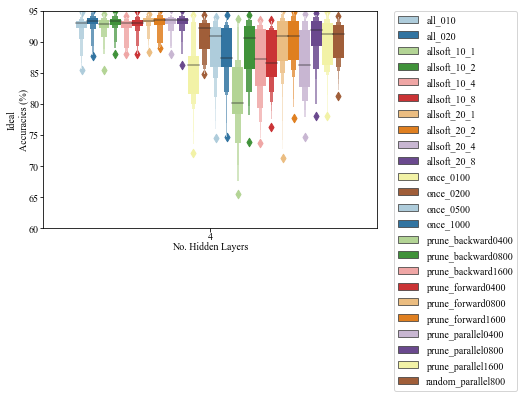

In [36]:
# Plot median accuracy vs num hidden layers
fig = plt.figure()
#fig.set_figheight(1.5)
#fig.set_figwidth(1.75)
df4 = df[df["hidden"] == 4]
plt0 = sns.boxenplot(x = "hidden", y = "idealacc", data = df4, hue="method", palette =sns.color_palette("Paired")) #, palette = sns.cubehelix_palette(8, dark=0.35))
plt.ylabel("Ideal\nAccuracies (%)", labelpad = 0)
plt.xlabel("No. Hidden Layers", labelpad=0)
plt.ylim([60,95])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt0.tick_params(axis='both', which='major', pad=0)
fig = plt0.get_figure()
figname = plots + "VAD_CompTanh_median.pdf"
#fig.savefig(figname, dpi=300, bbox_inches='tight')

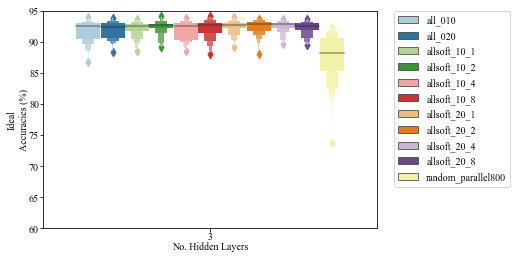

In [37]:
# Plot median accuracy vs num hidden layers
fig = plt.figure()
#fig.set_figheight(1.5)
#fig.set_figwidth(1.75)
df3 = df[df["hidden"] == 3]
df3 = pd.concat((df3[df3["method"].str.startswith("all")],df3[df3["method"].str.startswith("random")]))
plt0 = sns.boxenplot(x = "hidden", y = "idealacc", data = df3, hue="method", palette =sns.color_palette("Paired")) #, palette = sns.cubehelix_palette(8, dark=0.35))
plt.ylabel("Ideal\nAccuracies (%)", labelpad = 0)
plt.xlabel("No. Hidden Layers", labelpad=0)
plt.ylim([60,95])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt0.tick_params(axis='both', which='major', pad=0)
fig = plt0.get_figure()
figname = plots + "VAD_CompTanh_median.pdf"
#fig.savefig(figname, dpi=300, bbox_inches='tight')

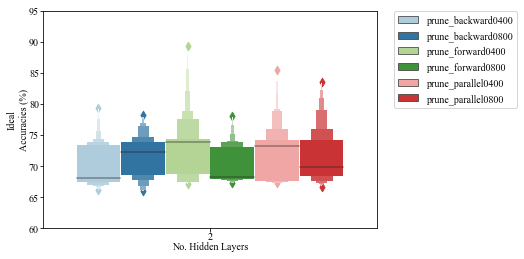

In [38]:
# Plot median accuracy vs num hidden layers
fig = plt.figure()
#fig.set_figheight(1.5)
#fig.set_figwidth(1.75)
df2 = df[df["hidden"] == 2]
plt0 = sns.boxenplot(x = "hidden", y = "idealacc", data = df2, hue="method", palette =sns.color_palette("Paired")) #, palette = sns.cubehelix_palette(8, dark=0.35))
plt.ylabel("Ideal\nAccuracies (%)", labelpad = 0)
plt.xlabel("No. Hidden Layers", labelpad=0)
plt.ylim([60,95])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt0.tick_params(axis='both', which='major', pad=0)
fig = plt0.get_figure()
figname = plots + "VAD_CompTanh_median.pdf"
#fig.savefig(figname, dpi=300, bbox_inches='tight')

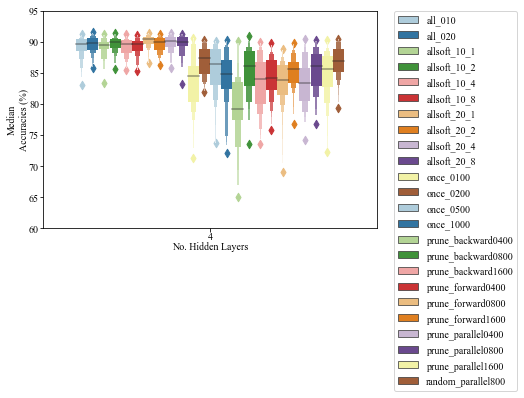

In [39]:
# Plot median accuracy vs num hidden layers
fig = plt.figure()
#fig.set_figheight(1.5)
#fig.set_figwidth(1.75)
plt0 = sns.boxenplot(x = "hidden", y = "medians", data = df4, hue="method", palette =sns.color_palette("Paired")) #, palette = sns.cubehelix_palette(8, dark=0.35))
plt.ylabel("Median\nAccuracies (%)", labelpad = 0)
plt.xlabel("No. Hidden Layers", labelpad=0)
plt.ylim([60,95])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt0.tick_params(axis='both', which='major', pad=0)
fig = plt0.get_figure()
figname = plots + "VAD_CompTanh_median.pdf"
#fig.savefig(figname, dpi=300, bbox_inches='tight')

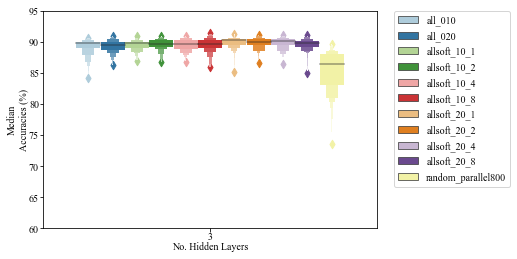

In [40]:
# Plot median accuracy vs num hidden layers
fig = plt.figure()
#fig.set_figheight(1.5)
#fig.set_figwidth(1.75)
plt0 = sns.boxenplot(x = "hidden", y = "medians", data = df3, hue="method", palette =sns.color_palette("Paired")) #, palette = sns.cubehelix_palette(8, dark=0.35))
plt.ylabel("Median\nAccuracies (%)", labelpad = 0)
plt.xlabel("No. Hidden Layers", labelpad=0)
plt.ylim([60,95])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt0.tick_params(axis='both', which='major', pad=0)
fig = plt0.get_figure()
figname = plots + "VAD_CompTanh_median.pdf"
#fig.savefig(figname, dpi=300, bbox_inches='tight')

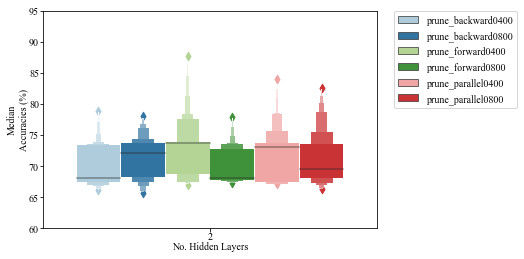

In [41]:
# Plot median accuracy vs num hidden layers
fig = plt.figure()
#fig.set_figheight(1.5)
#fig.set_figwidth(1.75)
plt0 = sns.boxenplot(x = "hidden", y = "medians", data = df2, hue="method", palette =sns.color_palette("Paired")) #, palette = sns.cubehelix_palette(8, dark=0.35))
plt.ylabel("Median\nAccuracies (%)", labelpad = 0)
plt.xlabel("No. Hidden Layers", labelpad=0)
plt.ylim([60,95])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt0.tick_params(axis='both', which='major', pad=0)
fig = plt0.get_figure()
figname = plots + "VAD_CompTanh_median.pdf"
#fig.savefig(figname, dpi=300, bbox_inches='tight')

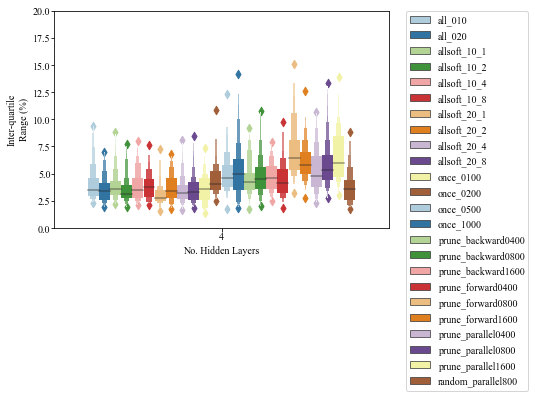

In [42]:
# Plot accuracy IQR vs num hidden layers
fig = plt.figure()
#fig.set_figheight(1.5)
#fig.set_figwidth(1.75)
plt0 = sns.boxenplot(x = "hidden", y = "iqr", data = df4, hue="method", palette =sns.color_palette("Paired")) #, palette = sns.cubehelix_palette(8, dark=0.35))
plt.ylabel("Inter-quartile\nRange (%)")
plt.xlabel("No. Hidden Layers")
plt.ylim([0,20])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt0.tick_params(axis='both', which='major', pad=0)
fig = plt0.get_figure()
figname = plots + "VAD_CompTanh_iqr.pdf"
#fig.savefig(figname, dpi=300, bbox_inches='tight')

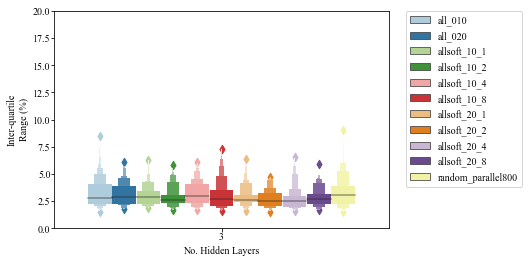

In [43]:
# Plot accuracy IQR vs num hidden layers
fig = plt.figure()
#fig.set_figheight(1.5)
#fig.set_figwidth(1.75)
plt0 = sns.boxenplot(x = "hidden", y = "iqr", data = df3, hue="method", palette =sns.color_palette("Paired")) #, palette = sns.cubehelix_palette(8, dark=0.35))
plt.ylabel("Inter-quartile\nRange (%)")
plt.xlabel("No. Hidden Layers")
plt.ylim([0,20])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt0.tick_params(axis='both', which='major', pad=0)
fig = plt0.get_figure()
figname = plots + "VAD_CompTanh_iqr.pdf"
#fig.savefig(figname, dpi=300, bbox_inches='tight')

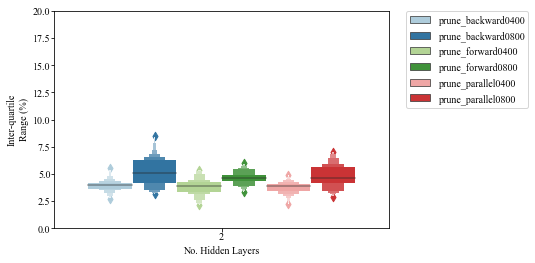

In [44]:
# Plot accuracy IQR vs num hidden layers
fig = plt.figure()
#fig.set_figheight(1.5)
#fig.set_figwidth(1.75)
plt0 = sns.boxenplot(x = "hidden", y = "iqr", data = df2, hue="method", palette =sns.color_palette("Paired")) #, palette = sns.cubehelix_palette(8, dark=0.35))
plt.ylabel("Inter-quartile\nRange (%)")
plt.xlabel("No. Hidden Layers")
plt.ylim([0,20])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt0.tick_params(axis='both', which='major', pad=0)
fig = plt0.get_figure()
figname = plots + "VAD_CompTanh_iqr.pdf"
#fig.savefig(figname, dpi=300, bbox_inches='tight')

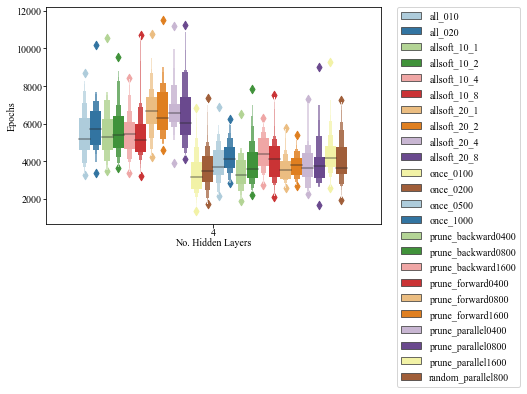

In [45]:
# Plot median accuracy vs num hidden layers
fig = plt.figure()
#fig.set_figheight(1.5)
#fig.set_figwidth(1.75)
plt0 = sns.boxenplot(x = "hidden", y = "epochs", data = df4, hue="method", palette =sns.color_palette("Paired")) #, palette = sns.cubehelix_palette(8, dark=0.35))
plt.ylabel("Epochs", labelpad = 0)
plt.xlabel("No. Hidden Layers", labelpad=0)
#plt.ylim([60,95])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt0.tick_params(axis='both', which='major', pad=0)
fig = plt0.get_figure()
figname = plots + "VAD_CompTanh_median.pdf"
#fig.savefig(figname, dpi=300, bbox_inches='tight')

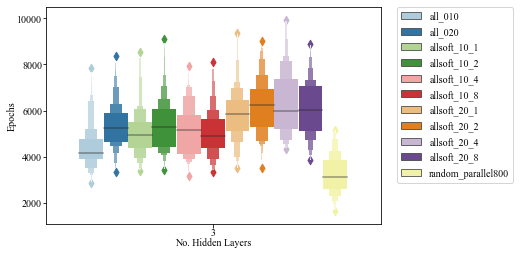

In [46]:
# Plot median accuracy vs num hidden layers
fig = plt.figure()
#fig.set_figheight(1.5)
#fig.set_figwidth(1.75)
plt0 = sns.boxenplot(x = "hidden", y = "epochs", data = df3, hue="method", palette =sns.color_palette("Paired")) #, palette = sns.cubehelix_palette(8, dark=0.35))
plt.ylabel("Epochs", labelpad = 0)
plt.xlabel("No. Hidden Layers", labelpad=0)
#plt.ylim([60,95])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt0.tick_params(axis='both', which='major', pad=0)
fig = plt0.get_figure()
figname = plots + "VAD_CompTanh_median.pdf"
#fig.savefig(figname, dpi=300, bbox_inches='tight')

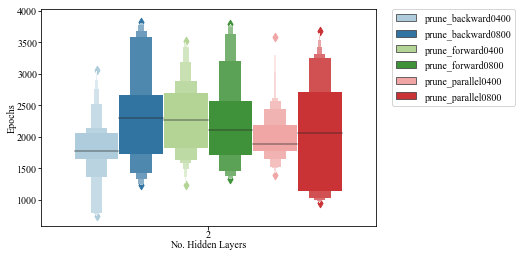

In [47]:
# Plot median accuracy vs num hidden layers
fig = plt.figure()
#fig.set_figheight(1.5)
#fig.set_figwidth(1.75)
plt0 = sns.boxenplot(x = "hidden", y = "epochs", data = df2, hue="method", palette =sns.color_palette("Paired")) #, palette = sns.cubehelix_palette(8, dark=0.35))
plt.ylabel("Epochs", labelpad = 0)
plt.xlabel("No. Hidden Layers", labelpad=0)
#plt.ylim([60,95])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt0.tick_params(axis='both', which='major', pad=0)
fig = plt0.get_figure()
figname = plots + "VAD_CompTanh_median.pdf"
#fig.savefig(figname, dpi=300, bbox_inches='tight')